In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os,json
import glob
from pathlib import Path

In [2]:
config_file=open("..//config.json",'r')

In [3]:
config_data=json.load(config_file)

In [4]:
config_data

{'max_open_trades': 3,
 'stake_currency': 'USDT',
 'stake_amount': 100,
 'tradable_balance_ratio': 0.99,
 'fiat_display_currency': 'USD',
 'timeframe': '5m',
 'dry_run': True,
 'dry_run_wallet': 1000,
 'cancel_open_orders_on_exit': False,
 'trading_mode': 'futures',
 'margin_mode': 'isolated',
 'unfilledtimeout': {'entry': 10,
  'exit': 10,
  'exit_timeout_count': 0,
  'unit': 'minutes'},
 'entry_pricing': {'price_side': 'same',
  'use_order_book': True,
  'order_book_top': 1,
  'price_last_balance': 0.0,
  'check_depth_of_market': {'enabled': False, 'bids_to_ask_delta': 1}},
 'exit_pricing': {'price_side': 'same',
  'use_order_book': True,
  'order_book_top': 1},
 'exchange': {'name': 'binance',
  'key': '',
  'secret': '',
  'ccxt_config': {},
  'ccxt_async_config': {},
  'pair_whitelist': ['.*/USDT'],
  'pair_blacklist': ['BNB/.*']},
 'pairlists': [{'method': 'StaticPairList',
   'number_assets': 20,
   'sort_key': 'quoteVolume',
   'min_value': 0,
   'refresh_period': 1800}],
 'edg

In [5]:
config_exchange=config_data["exchange"]["name"]

In [6]:
config_exchange

'binance'

In [7]:
path="../user_data/data"

In [8]:
f_half_path=os.path.join(path,config_exchange)

In [9]:
f_half_path

'../user_data/data/binance'

In [10]:
for root, dirs,files in os.walk(f_half_path):
        for div in dirs:
            if(div==".ipynb_checkpoints"):
                break
            else:    
                s_half_path=os.path.join(root, div)
                
half_path="*.json"  


In [11]:
s_half_path

'../user_data/data/binance/futures'

In [12]:
full_path=os.path.join(s_half_path,half_path)

In [13]:
full_path

'../user_data/data/binance/futures/*.json'

In [14]:
# Use glob to find all JSON files in the directory
json_files = glob.glob(full_path)
symbols=[]
df_list=[]
# Iterate over the list of JSON files
for file in json_files:
    size=os.path.getsize(file)
    if (size ==0 or size <=2):
        os.remove(file)
    else:    
        index=file.split(s_half_path+"/")
        index=index[1]
        index_2=index.find('-')
        symbol=index[:index_2]
        symbols.append(symbol)
        df=pd.read_json(file)
        df.columns=['date','open','high','low','close','volumn']
        df['date']=pd.to_datetime(df['date'],unit='ms')
        df=df.set_index('date')
        df_list.append(df)


In [15]:
mergdf=pd.concat(dict(zip(symbols,df_list)),axis=1)

In [16]:
mergdf

PEOPLE_USDT                                    BAKE_USDT  \
                           open      high       low   close volumn      open   
date                                                                           
2023-01-01 00:00:00    0.020241  0.020294  0.020081  0.0202    0.0    0.1283   
2023-01-01 00:05:00         NaN       NaN       NaN     NaN    NaN    0.1280   
2023-01-01 00:10:00         NaN       NaN       NaN     NaN    NaN    0.1279   
2023-01-01 00:15:00         NaN       NaN       NaN     NaN    NaN    0.1280   
2023-01-01 00:20:00         NaN       NaN       NaN     NaN    NaN    0.1277   
...                         ...       ...       ...     ...    ...       ...   
2023-01-09 10:00:00         NaN       NaN       NaN     NaN    NaN    0.1483   
2023-01-09 10:05:00         NaN       NaN       NaN     NaN    NaN    0.1482   
2023-01-09 10:10:00         NaN       NaN       NaN     NaN    NaN    0.1484   
2023-01-09 10:15:00         NaN       NaN       NaN     NaN    NaN    0.1486   
2023-01-09 10:20:00         NaN       NaN       NaN     NaN    NaN       NaN   

                                                       ... THETA_USDT          \
                       high     low   close    volumn  ...       open    high   
date                                                   ...                      
2023-01-01 00:00:00  0.1283  0.1280  0.1281  273548.0  ...     0.7223  0.7225   
2023-01-01 00:05:00  0.1281  0.1279  0.1279   92622.0  ...     0.7210  0.7214   
2023-01-01 00:10:00  0.1280  0.1279  0.1279   80856.0  ...     0.7200  0.7210   
2023-01-01 00:15:00  0.1280  0.1276  0.1278  130643.0  ...     0.7201  0.7214   
2023-01-01 00:20:00  0.1278  0.1277  0.1277   12164.0  ...     0.7213  0.7217   
...                     ...     ...     ...       ...  ...        ...     ...   
2023-01-09 10:00:00  0.1485  0.1480  0.1482  240797.0  ...     0.8181  0.8181   
2023-01-09 10:05:00  0.1485  0.1481  0.1484   91253.0  ...     0.8152  0.8155   
2023-01-09 10:10:00  0.1487  0.1483  0.1487  194704.0  ...        NaN     NaN   
2023-01-09 10:15:00  0.1489  0.1484  0.1487  142083.0  ...        NaN     NaN   
2023-01-09 10:20:00     NaN     NaN     NaN       NaN  ...        NaN     NaN   

                                              KNC_USDT                  \
                        low   close    volumn     open    high     low   
date                                                                     
2023-01-01 00:00:00  0.7201  0.7210  174741.1   0.4562  0.4562  0.4488   
2023-01-01 00:05:00  0.7200  0.7201   39427.7      NaN     NaN     NaN   
2023-01-01 00:10:00  0.7200  0.7202   67303.9      NaN     NaN     NaN   
2023-01-01 00:15:00  0.7199  0.7214   58503.6      NaN     NaN     NaN   
2023-01-01 00:20:00  0.7209  0.7213   50718.9      NaN     NaN     NaN   
...                     ...     ...       ...      ...     ...     ...   
2023-01-09 10:00:00  0.8153  0.8153  187718.1      NaN     NaN     NaN   
2023-01-09 10:05:00  0.8119  0.8127  437954.7      NaN     NaN     NaN   
2023-01-09 10:10:00     NaN     NaN       NaN      NaN     NaN     NaN   
2023-01-09 10:15:00     NaN     NaN       NaN      NaN     NaN     NaN   
2023-01-09 10:20:00     NaN     NaN       NaN      NaN     NaN     NaN   

                                    
                      close volumn  
date                                
2023-01-01 00:00:00  0.4512    0.0  
2023-01-01 00:05:00     NaN    NaN  
2023-01-01 00:10:00     NaN    NaN  
2023-01-01 00:15:00     NaN    NaN  
2023-01-01 00:20:00     NaN    NaN  
...                     ...    ...  
2023-01-09 10:00:00     NaN    NaN  
2023-01-09 10:05:00     NaN    NaN  
2023-01-09 10:10:00     NaN    NaN  
2023-01-09 10:15:00     NaN    NaN  
2023-01-09 10:20:00     NaN    NaN  

[2445 rows x 730 columns]

In [17]:
mergdf.head()

PEOPLE_USDT                                    BAKE_USDT  \
                           open      high       low   close volumn      open   
date                                                                           
2023-01-01 00:00:00    0.020241  0.020294  0.020081  0.0202    0.0    0.1283   
2023-01-01 00:05:00         NaN       NaN       NaN     NaN    NaN    0.1280   
2023-01-01 00:10:00         NaN       NaN       NaN     NaN    NaN    0.1279   
2023-01-01 00:15:00         NaN       NaN       NaN     NaN    NaN    0.1280   
2023-01-01 00:20:00         NaN       NaN       NaN     NaN    NaN    0.1277   

                                                       ... THETA_USDT          \
                       high     low   close    volumn  ...       open    high   
date                                                   ...                      
2023-01-01 00:00:00  0.1283  0.1280  0.1281  273548.0  ...     0.7223  0.7225   
2023-01-01 00:05:00  0.1281  0.1279  0.1279   92622.0  ...     0.7210  0.7214   
2023-01-01 00:10:00  0.1280  0.1279  0.1279   80856.0  ...     0.7200  0.7210   
2023-01-01 00:15:00  0.1280  0.1276  0.1278  130643.0  ...     0.7201  0.7214   
2023-01-01 00:20:00  0.1278  0.1277  0.1277   12164.0  ...     0.7213  0.7217   

                                              KNC_USDT                  \
                        low   close    volumn     open    high     low   
date                                                                     
2023-01-01 00:00:00  0.7201  0.7210  174741.1   0.4562  0.4562  0.4488   
2023-01-01 00:05:00  0.7200  0.7201   39427.7      NaN     NaN     NaN   
2023-01-01 00:10:00  0.7200  0.7202   67303.9      NaN     NaN     NaN   
2023-01-01 00:15:00  0.7199  0.7214   58503.6      NaN     NaN     NaN   
2023-01-01 00:20:00  0.7209  0.7213   50718.9      NaN     NaN     NaN   

                                    
                      close volumn  
date                                
2023-01-01 00:00:00  0.4512    0.0  
2023-01-01 00:05:00     NaN    NaN  
2023-01-01 00:10:00     NaN    NaN  
2023-01-01 00:15:00     NaN    NaN  
2023-01-01 00:20:00     NaN    NaN  

[5 rows x 730 columns]

In [18]:
closesdf = mergdf.loc[:,mergdf.columns.get_level_values(1).isin(['close'])]

In [19]:
closesdf.columns = closesdf.columns.droplevel(1)

In [20]:
closesdf

,PEOPLE_USDT,BAKE_USDT,BTCDOM_USDT,GAL_USDT,SFP_USDT,1000LUNC_USDT,MATIC_USDT,SNX_USDT,IOTA_USDT,QNT_USDT,...,DYDX_USDT,BTC_USDT,NKN_USDT,DGB_USDT,HNT_USDT,HBAR_USDT,ALPHA_USDT,JASMY_USDT,THETA_USDT,KNC_USDT
date,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0.0202,0.1281,1366.126676,0.0,0.3954,0.1451,0.0,1.432,0.1699,105.674071,...,1.091541,16529.2,0.078983,0.007761,1.514,0.036405,0.0,0.003082,0.7210,0.4512
2023-01-01 00:05:00,NaN,0.1279,NaN,NaN,NaN,0.1459,NaN,NaN,NaN,NaN,...,NaN,16521.5,NaN,NaN,1.513,NaN,NaN,NaN,0.7201,NaN
2023-01-01 00:10:00,NaN,0.1279,NaN,NaN,NaN,0.1462,NaN,NaN,NaN,NaN,...,NaN,16517.4,NaN,NaN,1.498,NaN,NaN,NaN,0.7202,NaN
2023-01-01 00:15:00,NaN,0.1278,NaN,NaN,NaN,0.1462,NaN,NaN,NaN,NaN,...,NaN,16530.1,NaN,NaN,1.501,NaN,NaN,NaN,0.7214,NaN
2023-01-01 00:20:00,NaN,0.1277,NaN,NaN,NaN,0.1467,NaN,NaN,NaN,NaN,...,NaN,16531.8,NaN,NaN,1.502,NaN,NaN,NaN,0.7213,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09 10:00:00,NaN,0.1482,NaN,NaN,NaN,0.1610,NaN,NaN,NaN,NaN,...,NaN,17228.7,NaN,NaN,1.935,NaN,NaN,NaN,0.8153,NaN
2023-01-09 10:05:00,NaN,0.1484,NaN,NaN,NaN,0.1607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.935,NaN,NaN,NaN,0.8127,NaN
2023-01-09 10:10:00,NaN,0.1487,NaN,NaN,NaN,0.1612,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
logretdf = np.log(closesdf.pct_change() + 1)

In [22]:
logretdf.corr()

,PEOPLE_USDT,BAKE_USDT,BTCDOM_USDT,GAL_USDT,SFP_USDT,1000LUNC_USDT,MATIC_USDT,SNX_USDT,IOTA_USDT,QNT_USDT,...,DYDX_USDT,BTC_USDT,NKN_USDT,DGB_USDT,HNT_USDT,HBAR_USDT,ALPHA_USDT,JASMY_USDT,THETA_USDT,KNC_USDT
PEOPLE_USDT,1.000000,0.055419,-0.814347,NaN,0.673195,0.024824,NaN,0.531168,0.641744,0.519407,...,0.671498,-0.027886,0.767388,0.798605,0.064105,0.739817,NaN,0.587697,0.038942,0.790721
BAKE_USDT,0.055419,1.000000,-0.044223,NaN,0.034659,0.357616,NaN,-0.006886,0.033469,0.028739,...,0.056742,0.579478,0.038492,0.043552,0.309996,0.040537,NaN,0.029672,0.587813,0.032272
BTCDOM_USDT,-0.814347,-0.044223,1.000000,NaN,-0.651721,-0.050693,NaN,-0.586991,-0.611087,-0.514733,...,-0.591045,0.024689,-0.582331,-0.719031,-0.028019,-0.667076,NaN,-0.397014,-0.045062,-0.778701
GAL_USDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SFP_USDT,0.673195,0.034659,-0.651721,NaN,1.000000,-0.008699,NaN,0.392824,0.655351,0.513626,...,0.666552,-0.025263,0.706267,0.770120,-0.015193,0.650353,NaN,0.456729,0.016585,0.659048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HBAR_USDT,0.739817,0.040537,-0.667076,NaN,0.650353,0.000797,NaN,0.514373,0.756210,0.415106,...,0.690193,-0.022958,0.695161,0.805458,0.074127,1.000000,NaN,0.538627,0.023777,0.741629
ALPHA_USDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JASMY_USDT,0.587697,0.029672,-0.397014,NaN,0.456729,-0.027108,NaN,0.350983,0.603892,0.306575,...,0.349771,-0.014232,0.509730,0.425819,0.038422,0.538627,NaN,1.000000,0.015387,0.433136
THETA_USDT,0.038942,0.587813,-0.045062,NaN,0.016585,0.411050,NaN,0.012000,0.034425,0.031814,...,0.058334,0.611444,0.037246,0.031868,0.327692,0.023777,NaN,0.015387,1.000000,0.042469


In [23]:
sns.set(rc ={'figure.figsize':(50,30)})

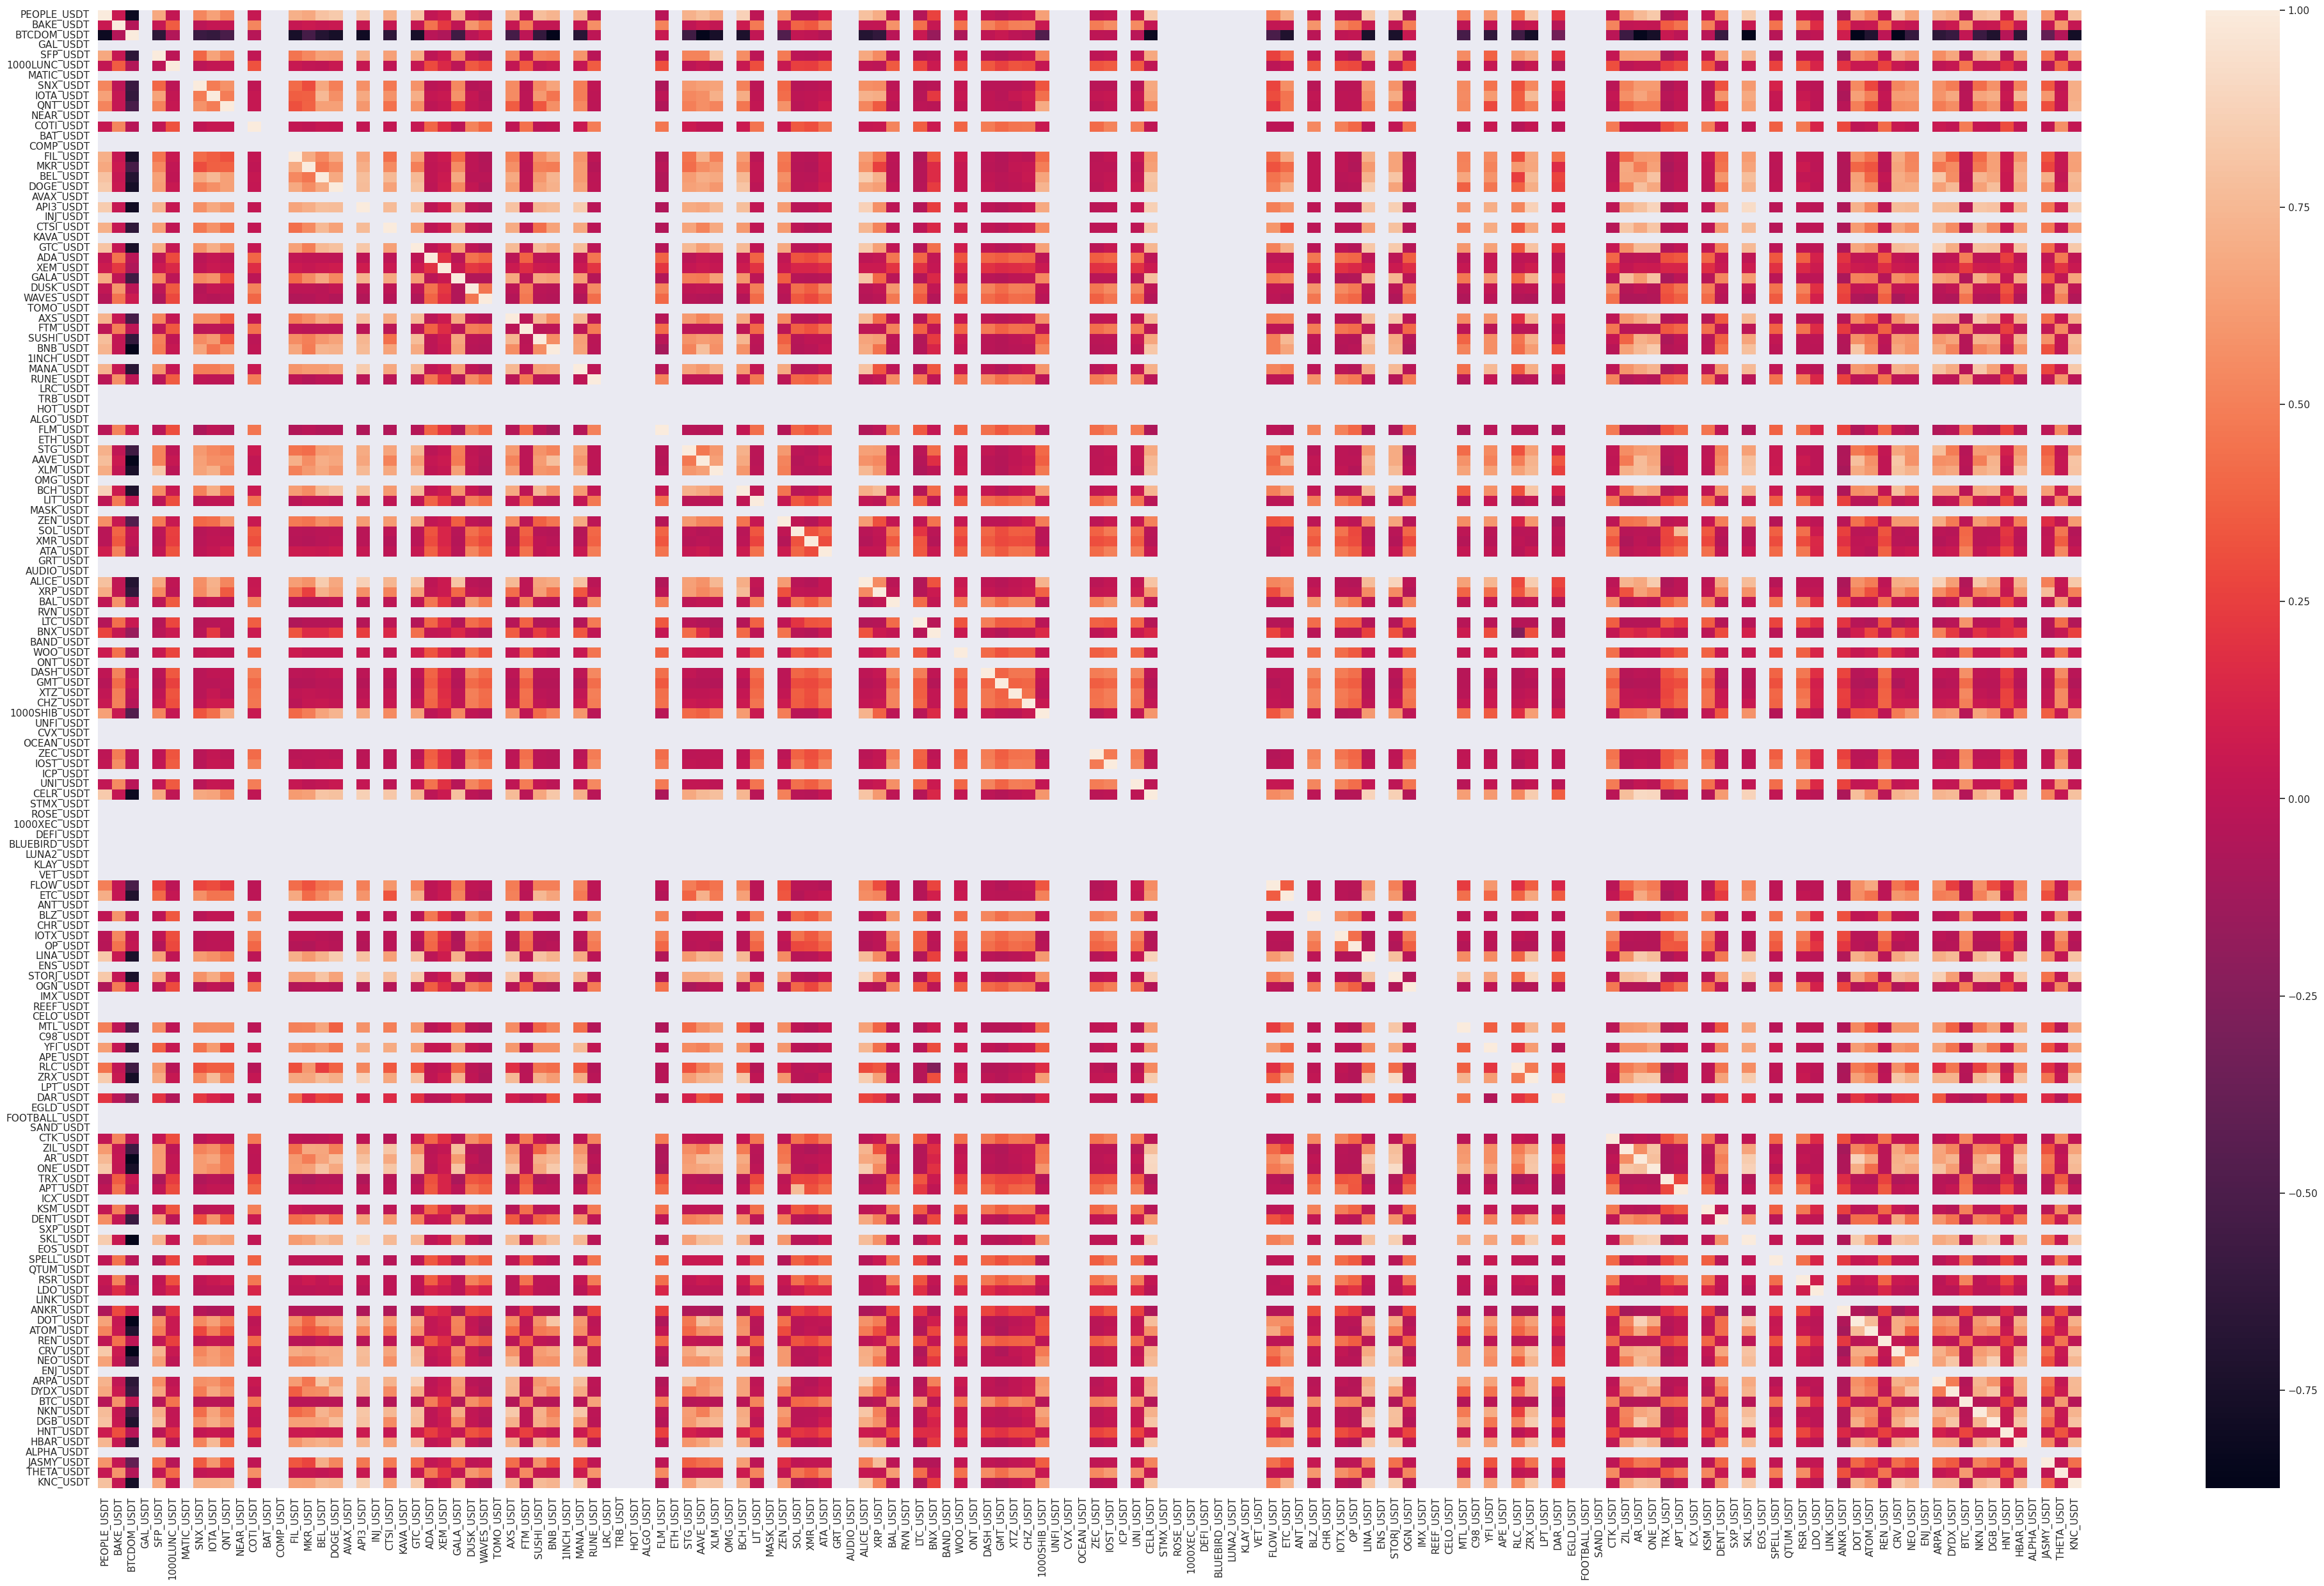

In [24]:
plt_heat=sns.heatmap(logretdf.corr())

In [25]:
fig=plt_heat.get_figure()


In [26]:
fig.savefig("output.jpg")

In [27]:
corr_df = logretdf.corr()

In [28]:
corr_df

,PEOPLE_USDT,BAKE_USDT,BTCDOM_USDT,GAL_USDT,SFP_USDT,1000LUNC_USDT,MATIC_USDT,SNX_USDT,IOTA_USDT,QNT_USDT,...,DYDX_USDT,BTC_USDT,NKN_USDT,DGB_USDT,HNT_USDT,HBAR_USDT,ALPHA_USDT,JASMY_USDT,THETA_USDT,KNC_USDT
PEOPLE_USDT,1.000000,0.055419,-0.814347,NaN,0.673195,0.024824,NaN,0.531168,0.641744,0.519407,...,0.671498,-0.027886,0.767388,0.798605,0.064105,0.739817,NaN,0.587697,0.038942,0.790721
BAKE_USDT,0.055419,1.000000,-0.044223,NaN,0.034659,0.357616,NaN,-0.006886,0.033469,0.028739,...,0.056742,0.579478,0.038492,0.043552,0.309996,0.040537,NaN,0.029672,0.587813,0.032272
BTCDOM_USDT,-0.814347,-0.044223,1.000000,NaN,-0.651721,-0.050693,NaN,-0.586991,-0.611087,-0.514733,...,-0.591045,0.024689,-0.582331,-0.719031,-0.028019,-0.667076,NaN,-0.397014,-0.045062,-0.778701
GAL_USDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SFP_USDT,0.673195,0.034659,-0.651721,NaN,1.000000,-0.008699,NaN,0.392824,0.655351,0.513626,...,0.666552,-0.025263,0.706267,0.770120,-0.015193,0.650353,NaN,0.456729,0.016585,0.659048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HBAR_USDT,0.739817,0.040537,-0.667076,NaN,0.650353,0.000797,NaN,0.514373,0.756210,0.415106,...,0.690193,-0.022958,0.695161,0.805458,0.074127,1.000000,NaN,0.538627,0.023777,0.741629
ALPHA_USDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JASMY_USDT,0.587697,0.029672,-0.397014,NaN,0.456729,-0.027108,NaN,0.350983,0.603892,0.306575,...,0.349771,-0.014232,0.509730,0.425819,0.038422,0.538627,NaN,1.000000,0.015387,0.433136
THETA_USDT,0.038942,0.587813,-0.045062,NaN,0.016585,0.411050,NaN,0.012000,0.034425,0.031814,...,0.058334,0.611444,0.037246,0.031868,0.327692,0.023777,NaN,0.015387,1.000000,0.042469
